# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

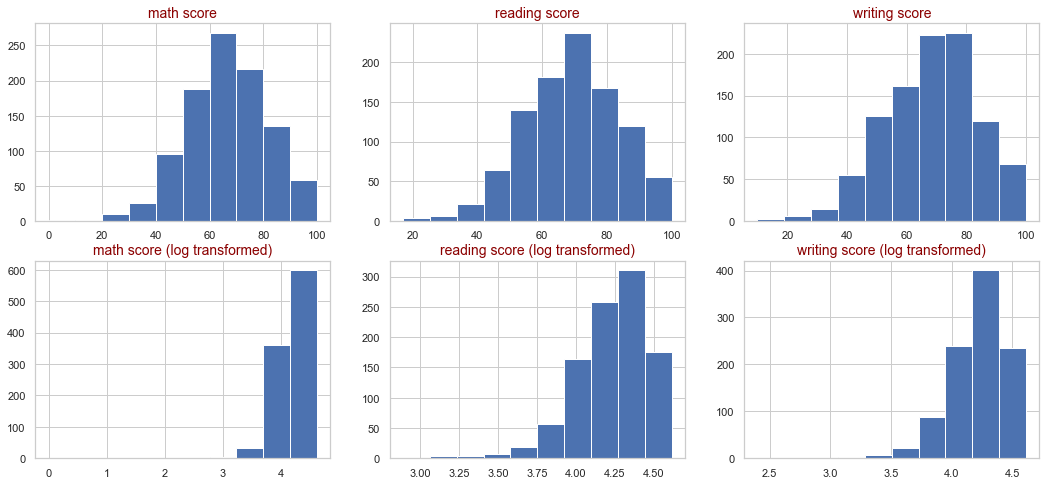

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import warnings; warnings.filterwarnings('ignore')

font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
grades = pd.read_csv("StudentsPerformance_1.csv")
score_types = ["math score","reading score","writing score"]
plt.figure(figsize=(18,8))

for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(grades[score_types[i]])
    plt.title(score_types[i],fontdict=font)

for i in range(3):
    plt.subplot(2,3,i+4)
    plt.hist(np.log(grades[score_types[i]]+1))
    plt.title(score_types[i] + ' (log transformed)',fontdict=font)

plt.show()

First impression is they are distributed normally.

In [2]:
for i in ["math score", "reading score", "writing score"]:
    print(grades[i].min())

0
17
10


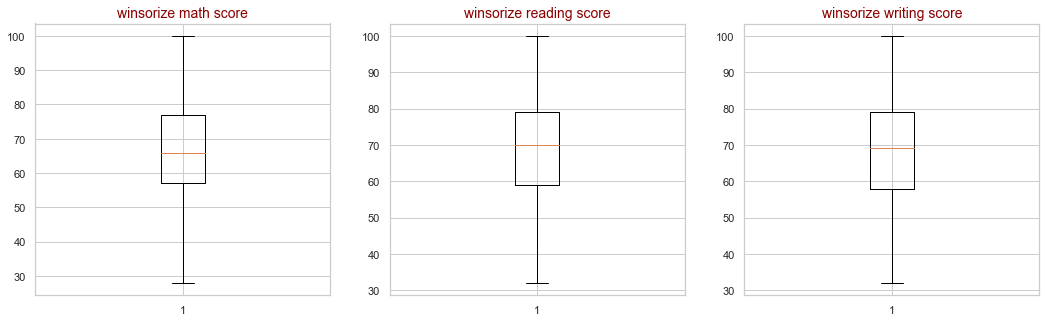

In [3]:
from scipy.stats.mstats import winsorize
grades["winsorize_math_score"] = winsorize(grades["math score"], (0.01, 0))
grades["winsorize_reading_score"] = winsorize(grades["reading score"], (0.01, 0))
grades["winsorize_writing_score"] = winsorize(grades["writing score"], (0.01, 0))


plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
plt.boxplot(grades["winsorize_math_score"])
plt.title("winsorize math score",fontdict=font)
plt.subplot(1,3,2)
plt.boxplot(grades["winsorize_reading_score"])
plt.title("winsorize reading score",fontdict=font)
plt.subplot(1,3,3)
plt.boxplot(grades["winsorize_writing_score"])
plt.title("winsorize writing score",fontdict=font)
    
plt.show()

In [4]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
pd.options.display.float_format = "{:.8f}".format
variables = ["math score","reading score","writing score","winsorize_math_score","winsorize_reading_score","winsorize_writing_score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats',
                                           'jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(grades[variable])
    norm_stats = normaltest(grades[variable])
    distribution_tests = distribution_tests.append({"variable": variable,
                                                    "jarque_bera_stats" : jb_stats[0] ,
                                                    "jarque_bera_p_value" : jb_stats[1] ,
                                                    "normal_stats": norm_stats[0] , 
                                                    "normal_p_value" : norm_stats[1]
                                                    }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91225669,0.00035051,15.40896051,0.00045080
1,reading score,11.38330058,0.00337402,11.11741280,0.00385376
2,writing score,13.98509448,0.00091870,13.60645084,0.00111019
3,winsorize_math_score,5.72931251,0.05700272,6.18185961,0.04545967
4,winsorize_reading_score,9.78135812,0.00751632,11.24841593,0.00360942
5,winsorize_writing_score,12.37024422,0.00205985,16.61031975,0.00024724


$H_0$: data is normally-distributed

$H_A$: data is not normally-distributed

**For alpha value of 0.05; Jarque Bera and Normal P values are suggesting that all variables are not normally distributed- data is not normally-distributed**

In [5]:
from sklearn.preprocessing import normalize

grades["Norm_math score"]=normalize(np.array(grades["math score"]).reshape(1,-1))[0]
grades["Norm_reading score"]=normalize(np.array(grades["reading score"]).reshape(1,-1))[0]
grades["Norm_writing score"]=normalize(np.array(grades["writing score"]).reshape(1,-1))[0]

normal_features = ["math score","reading score","writing score","Norm_math score","Norm_reading score","Norm_writing score"]

print("Minimum Value\n-------",)
print(grades[normal_features].min())
print("Maximum Value\n-------",)
print(grades[normal_features].max())

Minimum Value
-------
math score            0.00000000
reading score        17.00000000
writing score        10.00000000
Norm_math score       0.00000000
Norm_reading score    0.00760468
Norm_writing score    0.00453515
dtype: float64
Maximum Value
-------
math score           100.00000000
reading score        100.00000000
writing score        100.00000000
Norm_math score        0.04663819
Norm_reading score     0.04473343
Norm_writing score     0.04535148
dtype: float64


In [6]:
grades[normal_features]

,math score,reading score,writing score,Norm_math score,Norm_reading score,Norm_writing score
0,72,72,74,0.03357950,0.03220807,0.03356009
1,69,90,88,0.03218035,0.04026008,0.03990930
2,90,95,93,0.04197438,0.04249675,0.04217688
3,47,57,44,0.02191995,0.02549805,0.01995465
4,76,78,75,0.03544503,0.03489207,0.03401361
...,...,...,...,...,...,...
995,88,99,95,0.04104161,0.04428609,0.04308390
996,62,55,55,0.02891568,0.02460338,0.02494331
997,59,71,65,0.02751653,0.03176073,0.02947846
998,68,78,77,0.03171397,0.03489207,0.03492064


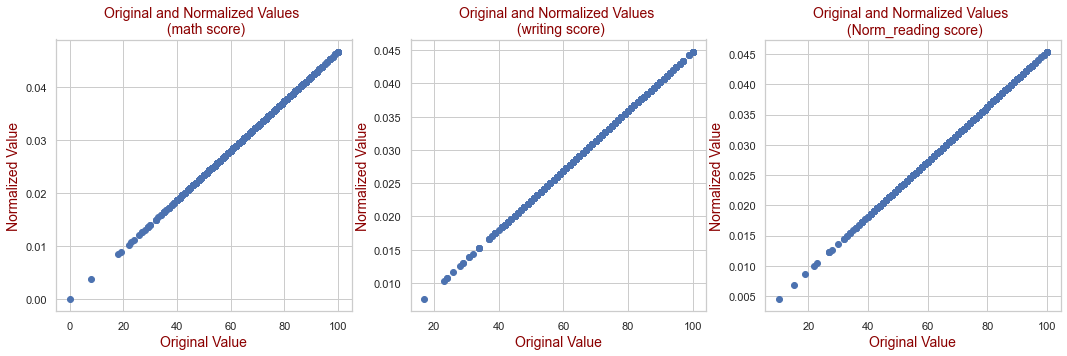

In [7]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(grades[normal_features[i]],grades[normal_features[i+3]])
    plt.title("Original and Normalized Values \n ({})".format(normal_features[2*i]), fontdict=font)
    plt.xlabel("Original Value", fontdict=font)
    plt.ylabel("Normalized Value", fontdict=font)

plt.show()

In [8]:
variables = ["Norm_math score","Norm_reading score","Norm_writing score"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats',
                                           'jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(grades[variable])
    norm_stats = normaltest(grades[variable])
    distribution_tests = distribution_tests.append({"variable": variable,
                                                    "jarque_bera_stats" : jb_stats[0] ,
                                                    "jarque_bera_p_value" : jb_stats[1] ,
                                                    "normal_stats": norm_stats[0] , 
                                                    "normal_p_value" : norm_stats[1]
                                                    }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,Norm_math score,15.91225669,0.00035051,15.40896051,0.00045080
1,Norm_reading score,11.38330058,0.00337402,11.11741280,0.00385376
2,Norm_writing score,13.98509448,0.00091870,13.60645084,0.00111019


$H_0$: data is normally-distributed

$H_A$: data is not normally-distributed

**For alpha value of 0.05; Jarque Bera and Normal P values are suggesting that all variables are not normally distributed- data is not normally-distributed**

original data and normalize data stats are same??

**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

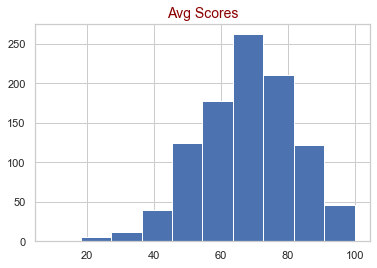

In [9]:
grades['AvgScores'] = grades[["math score","reading score","writing score"]].mean(axis=1)
plt.hist(grades['AvgScores'])
plt.title('Avg Scores',fontdict=font)
    
plt.show()

In [10]:
variables = ["AvgScores"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats',
                                           'jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(grades[variable])
    norm_stats = normaltest(grades[variable])
    distribution_tests = distribution_tests.append({"variable": variable,
                                                    "jarque_bera_stats" : jb_stats[0] ,
                                                    "jarque_bera_p_value" : jb_stats[1] ,
                                                    "normal_stats": norm_stats[0] , 
                                                    "normal_p_value" : norm_stats[1]
                                                    }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,AvgScores,15.45338791,0.00044090,15.18672133,0.00050379


In [11]:
grades["Norm_AvgScores"]=normalize(np.array(grades["AvgScores"]).reshape(1,-1))[0]
grades["winsorize_AvgScores"] = winsorize(grades["math score"], (0.01, 0))

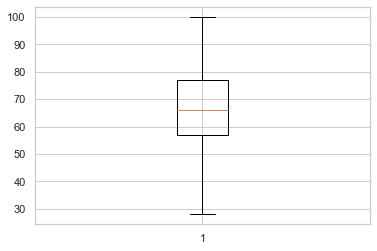

In [20]:
plt.boxplot(grades["winsorize_AvgScores"])
plt.show()

In [13]:
variables = ["AvgScores","Norm_AvgScores","winsorize_AvgScores"]
distribution_tests = pd.DataFrame(columns=['variable','jarque_bera_stats',
                                           'jarque_bera_p_value','normal_stats','normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(grades[variable])
    norm_stats = normaltest(grades[variable])
    distribution_tests = distribution_tests.append({"variable": variable,
                                                    "jarque_bera_stats" : jb_stats[0] ,
                                                    "jarque_bera_p_value" : jb_stats[1] ,
                                                    "normal_stats": norm_stats[0] , 
                                                    "normal_p_value" : norm_stats[1]
                                                    }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,AvgScores,15.45338791,0.00044090,15.18672133,0.00050379
1,Norm_AvgScores,15.45338791,0.00044090,15.18672133,0.00050379
2,winsorize_AvgScores,5.72931251,0.05700272,6.18185961,0.04545967


After one sided winsorizing method applied with the 99 percent as percentage "winsorize_AvgScores" value is higher than alpha(0.05) Null hypothesis cannot be rejected!


**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [14]:
studentgrades = pd.read_csv("StudentsPerformance_1.csv")
studentgrades['AvgScores'] = grades[["math score","reading score","writing score"]].mean(axis=1)

studentgrades

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,AvgScores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66666667
1,female,group C,some college,standard,completed,69,90,88,82.33333333
2,female,group B,master's degree,standard,none,90,95,93,92.66666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333333
4,male,group C,some college,standard,none,76,78,75,76.33333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00000000
996,male,group C,high school,free/reduced,none,62,55,55,57.33333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.00000000
998,female,group D,some college,standard,completed,68,78,77,74.33333333


In [15]:
studentgrades = studentgrades.drop(["math score","reading score","writing score"], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

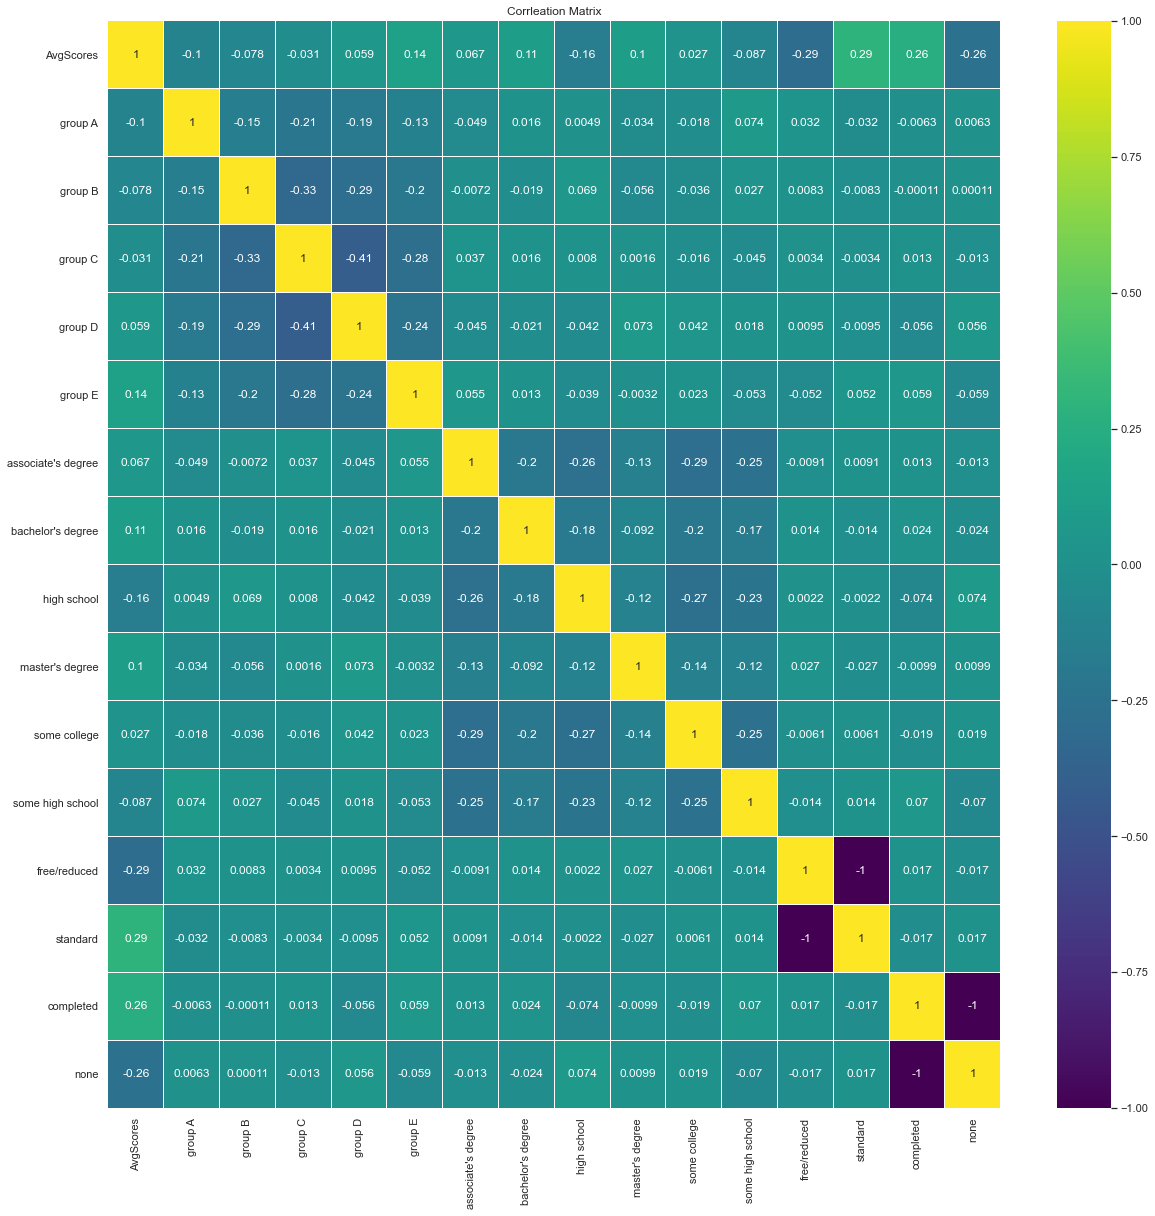

In [16]:
#studentgrades= pd.concat([studentgrades, pd.get_dummies(studentgrades["gender"])], axis=1)
studentgrades= pd.concat([studentgrades, pd.get_dummies(studentgrades["race/ethnicity"])], axis=1)
studentgrades= pd.concat([studentgrades, pd.get_dummies(studentgrades["parental level of education"])], axis=1)
studentgrades= pd.concat([studentgrades, pd.get_dummies(studentgrades["lunch"])], axis=1)
studentgrades= pd.concat([studentgrades, pd.get_dummies(studentgrades["test preparation course"])], axis=1)
df_correlation=studentgrades.corr()

plt.figure(figsize=(20,20))
sns.heatmap(df_correlation, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Corrleation Matrix")
plt.show

**(4)** Does the test preparation course have an impact on the target variable you created?

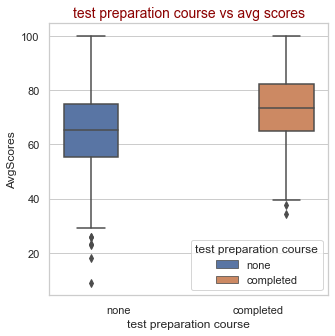

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(x = "test preparation course",  y = "AvgScores",hue = "test preparation course", data = studentgrades)
plt.title("test preparation course vs avg scores",fontdict=font)
plt.show()